# Task 1: Data Preprocessing
Q1. Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing 
duplicates, and converting the data to appropriate format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

# Load the Online retail dataset
df = pd.read_excel('Online retail.xlsx',header=None)

# Display the first few rows and check for any obvious issues
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


#### Handling Missing Values

In [2]:
# Check for missing values
print("Count of Missing Values: ",df.isnull().sum())

# Removing Duplicates

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm duplicates are removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

Count of Missing Values:  0    0
dtype: int64
Number of duplicate rows: 2325
Number of duplicate rows after removal: 0


#### Convert Data to Appropriate Format

In [3]:
# Getting list of all the unique items in the dataset
unique_items_list = []

# for each index it will iter row by row
for index, row in df.iterrows():  
    
    # splitting items with , and creating a new list for row & it will going add it agian 
    # ...item_series list for each iteration..so item_series will be list of lists..
    items_series = list(row.str.split(','))
    
    
    # agian reading each list elements from item_Series which is big list as mentioned above code
    for each_row_list in items_series:
        
        # iterating each item from each_row_lists
        for item in each_row_list:
            
            # for first iteration..unique_items_list is empty so first item directly append to it.
            #...from next onwards..it will start to check condition 'not in'
            #....& if item not found in unique_items_list list then it will append to it.
            #......finally we will get one unique item list..
            if item not in unique_items_list:
                unique_items_list.append(item)

print("Count of Unique Items: ", len(unique_items_list))

# Generating empty Dataframe with unique_items_list elements as column names

df_apriori = pd.DataFrame(columns=unique_items_list)
df_apriori

Count of Unique Items:  120


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins


In [4]:
# Creating a new DataFrame as a copy of the DataFrame having the columns

df1 = df_apriori.copy()

# Sorting items from main dataset again & assigning in respective column

# If for the item names obesrved w.r.t. each list will be assigned as number 1 & those items are not in list will be assigned
# with number 0. Transction encoder is fastest method to do all this.

for index, row in df.iterrows():
    items = str(row[0]).split(',')
    one_hot_encoding = np.zeros(len(unique_items_list),dtype=int)
    for item_name in items:
        for i,column in enumerate(df1.columns):
            if item_name == column:
                one_hot_encoding[i] = 1
    df1.loc[index] = one_hot_encoding

# Checking the dataset column types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5176 entries, 0 to 7500
Columns: 120 entries, shrimp to napkins
dtypes: int32(120)
memory usage: 2.4 MB


In [5]:
# Print first few rows of the new DataFrame
df1.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Performing EDA

In [6]:
# Checking for Purchased and Not Purchased Item Quantity Details for further Insights
zero =[]
one = []
for i in df_apriori.columns:
    zero.append(list(df1[i].value_counts())[0])
    one.append(list(df1[i].value_counts())[1])

count_df = pd.DataFrame([zero,one], columns=df_apriori.copy().columns)

# Giving row names
count_df.index = ['Not_Purchased', 'Purchased']

# Print the new DataFrame
count_df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
Not_Purchased,4664,5024,4938,5002,5108,5108,5097,4953,5014,4957,...,5094,5140,5113,5143,5163,5132,5143,5175,5169,5171
Purchased,512,152,238,174,68,68,79,223,162,219,...,82,36,63,33,13,44,33,1,7,5


In [7]:
# Deriving insights about Maximum and Minimum purchased item

print('Maximum Purchased Item:',count_df.idxmax(axis = 1)[1],':',count_df.loc['Purchased'].max())
print('Minimum Purchased Item:',count_df.idxmax(axis = 1)[0],':',count_df.loc['Not_Purchased'].max())

Maximum Purchased Item: mineral water : 1552
Minimum Purchased Item:  asparagus : 5175


In [8]:
# Sorting and displaying top 20 most frequently purchased items

sorted_df = pd.DataFrame(count_df.sort_values(by=['Purchased'],axis=1,ascending=False).transpose())
sorted_df.head(20)

,Not_Purchased,Purchased
mineral water,3624,1552
spaghetti,3988,1188
eggs,4099,1077
chocolate,4114,1062
french fries,4179,997
milk,4296,880
green tea,4300,876
ground beef,4473,703
frozen vegetables,4504,672
pancakes,4528,648


In [9]:
# Convert both columns to int64
sorted_df['Not_Purchased'] = sorted_df['Not_Purchased'].astype('int64')
sorted_df['Purchased'] = sorted_df['Purchased'].astype('int64')

#Check datatypes
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, mineral water to  asparagus
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Not_Purchased  120 non-null    int64
 1   Purchased      120 non-null    int64
dtypes: int64(2)
memory usage: 2.8+ KB


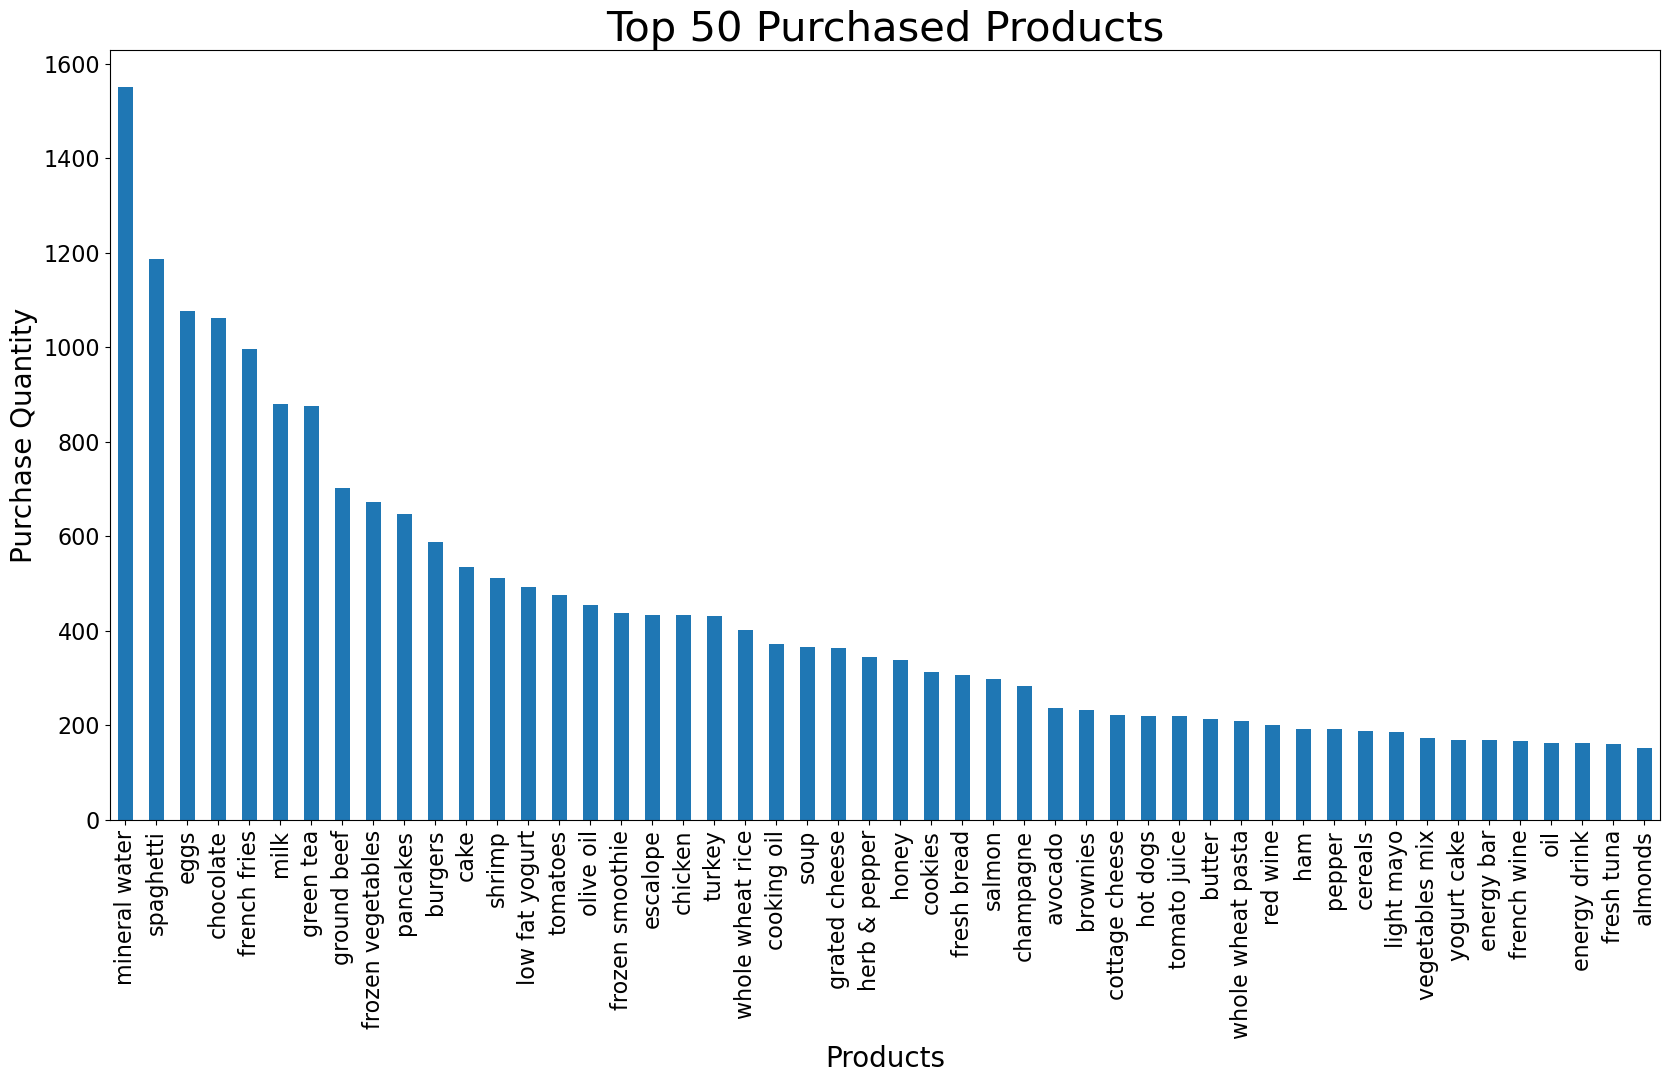

In [10]:
# Plotting sorted top 50 purchased products in a graph

fig = plt.subplots(figsize=(20,10))
purchased = sorted_df.head(50).xs('Purchased' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('Top 50 Purchased Products',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('Purchase Quantity', fontsize=20)
plt.show()

#### Insights from this data:

1. Popular Items: Items like "mineral water", "spaghetti", "eggs", "chocolate", etc., have relatively high purchase counts, 
    indicating they are popular among customers.
2. Least Popular Items: Items like "cream", "napkins", "water spray", etc., have very low purchase counts, suggesting they may 
    not be popular items or are niche products.

This data reveals that the everyday food items such as "mineral water", "eggs", "chocolate", "food" and "french fries" are the 
most popularly purchased items.

# Task 2: Association Rule Mining

Q1. Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.

Q2. Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products
    purchased together.
    
Q3. Set appropriate threshold for support, confidence and lift to extract meaning full rules.

#### Transform the Dataset

The Apriori algorithm expects a binary matrix (or DataFrame) where each column represents an item and 
each row represents a transaction. The values should be True or False indicating whether an item was purchased or not purchased.
We will convert the counts into binary values based on a threshold.

In [11]:
# Transpose df
sorted_df = sorted_df.transpose()
sorted_df

,mineral water,spaghetti,eggs,chocolate,french fries,milk,green tea,ground beef,frozen vegetables,pancakes,...,babies food,chutney,mashed potato,tea,sandwich,bramble,cream,napkins,water spray,asparagus
Not_Purchased,3624,3988,4099,4114,4179,4296,4300,4473,4504,4528,...,5145,5146,5146,5147,5148,5163,5169,5171,5173,5175
Purchased,1552,1188,1077,1062,997,880,876,703,672,648,...,31,30,30,29,28,13,7,5,3,1


#### Apply the Apriori Algorithm using minimum support value as 0.01

In [12]:

# Apply Apriori on the DataFrame with boolean values
freq_items = apriori(df1, min_support=0.01, use_colnames=True, max_len=5)

# Display the frequent itemsets
print(freq_items)

      support                                     itemsets
0    0.098918                                     (shrimp)
1    0.029366                                    (almonds)
2    0.045981                                    (avocado)
3    0.033617                             (vegetables mix)
4    0.013138                               (green grapes)
..        ...                                          ...
433  0.013910               (ground beef, spaghetti, milk)
434  0.011592         (french fries, spaghetti, chocolate)
435  0.011399    (spaghetti, frozen vegetables, chocolate)
436  0.012558  (ground beef, spaghetti, frozen vegetables)
437  0.013331          (ground beef, spaghetti, chocolate)

[438 rows x 2 columns]


In [13]:
# Display all the rows

#with pd.option_context('display.max_rows', None,):
#    print(freq_items)

#### Generating association rules using the metric 'confidence' with minimum threshold set to 20%

In [14]:
confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)
confidence_association.shape

(356, 10)

In [15]:
confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(shrimp),(mineral water),0.098918,0.299845,0.033617,0.339844,1.133396,0.003957,1.060589,0.130617
1,(shrimp),(eggs),0.098918,0.208076,0.020479,0.207031,0.994980,-0.000103,0.998683,-0.005568
2,(shrimp),(milk),0.098918,0.170015,0.025502,0.257812,1.516406,0.008685,1.118295,0.377930
3,(shrimp),(frozen vegetables),0.098918,0.129830,0.023764,0.240234,1.850377,0.010921,1.145314,0.510020
4,(shrimp),(spaghetti),0.098918,0.229521,0.030332,0.306641,1.336003,0.007629,1.111226,0.279108
5,(shrimp),(chocolate),0.098918,0.205178,0.026082,0.263672,1.285090,0.005786,1.079440,0.246198
6,(almonds),(mineral water),0.029366,0.299845,0.011012,0.375000,1.250644,0.002207,1.120247,0.206476
7,(avocado),(mineral water),0.045981,0.299845,0.016036,0.348739,1.163064,0.002248,1.075076,0.146960
8,(avocado),(milk),0.045981,0.170015,0.010819,0.235294,1.383957,0.003002,1.085364,0.290806
9,(avocado),(french fries),0.045981,0.192620,0.011592,0.252101,1.308800,0.002735,1.079531,0.247313


#### Building Lift Association rules using Confidence metrics

In [16]:
lift_association = association_rules(freq_items, metric="lift", min_threshold=1)
lift_association.shape

(840, 10)

In [17]:
lift_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(shrimp),(mineral water),0.098918,0.299845,0.033617,0.339844,1.133396,0.003957,1.060589,0.130617
1,(mineral water),(shrimp),0.299845,0.098918,0.033617,0.112113,1.133396,0.003957,1.014861,0.168100
2,(frozen smoothie),(shrimp),0.084815,0.098918,0.010626,0.125285,1.266550,0.002236,1.030143,0.229958
3,(shrimp),(frozen smoothie),0.098918,0.084815,0.010626,0.107422,1.266550,0.002236,1.025328,0.233557
4,(shrimp),(olive oil),0.098918,0.087713,0.011785,0.119141,1.358308,0.003109,1.035679,0.292748
5,(olive oil),(shrimp),0.087713,0.098918,0.011785,0.134361,1.358308,0.003109,1.040945,0.289152
6,(burgers),(shrimp),0.113794,0.098918,0.012751,0.112054,1.132799,0.001495,1.014794,0.132284
7,(shrimp),(burgers),0.098918,0.113794,0.012751,0.128906,1.132799,0.001495,1.017348,0.130100
8,(shrimp),(milk),0.098918,0.170015,0.025502,0.257812,1.516406,0.008685,1.118295,0.377930
9,(milk),(shrimp),0.170015,0.098918,0.025502,0.150000,1.516406,0.008685,1.060096,0.410304


#### Eliminating redundancy sets

In [18]:
redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape

(840, 10)

In [19]:
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ground beef),(spaghetti),0.135819,0.229521,0.055835,0.411095,1.791102,0.024661,1.308326,0.511102
1,(spaghetti),(ground beef),0.229521,0.135819,0.055835,0.243266,1.791102,0.024661,1.141988,0.573260
2,(ground beef),(mineral water),0.135819,0.299845,0.058733,0.432432,1.442184,0.018008,1.233606,0.354795
3,(mineral water),(ground beef),0.299845,0.135819,0.058733,0.195876,1.442184,0.018008,1.074686,0.437914
4,(milk),(mineral water),0.170015,0.299845,0.067813,0.398864,1.330231,0.016835,1.164718,0.299103


In [20]:
# Getting rid of redundant rows where set of antecedents & consequents is the same in reverse (for eg. rows 0 & 1 above) having 
# same lift & leverage, and choosing the row having higher confidence value

unique_rules = redundancy.iloc[::2]
unique_rules.shape

(420, 10)

In [21]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ground beef),(spaghetti),0.135819,0.229521,0.055835,0.411095,1.791102,0.024661,1.308326,0.511102
2,(ground beef),(mineral water),0.135819,0.299845,0.058733,0.432432,1.442184,0.018008,1.233606,0.354795
4,(milk),(mineral water),0.170015,0.299845,0.067813,0.398864,1.330231,0.016835,1.164718,0.299103
6,(spaghetti),(mineral water),0.229521,0.299845,0.085008,0.370370,1.235204,0.016187,1.112010,0.247141
8,(herb & pepper),(ground beef),0.066461,0.135819,0.022798,0.343023,2.525588,0.013771,1.315390,0.647056
10,"(spaghetti, mineral water)",(ground beef),0.085008,0.135819,0.024730,0.290909,2.141885,0.013184,1.218717,0.582651
12,(burgers),(eggs),0.113794,0.208076,0.036128,0.317487,1.525826,0.012450,1.160307,0.388868
14,(olive oil),(mineral water),0.087713,0.299845,0.038640,0.440529,1.469186,0.012340,1.251457,0.350055
16,(olive oil),(spaghetti),0.087713,0.229521,0.032457,0.370044,1.612246,0.012326,1.223068,0.416258
18,(soup),(mineral water),0.070904,0.299845,0.033423,0.471390,1.572109,0.012163,1.324519,0.391684


# Task 3: Analysis and Interpretation

Q1. Analyse the generated rules to identify interesting patterns and relationships between the products.

Q2. Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.

We have obtained all the unique rules with metric='lift'. Now, this unique_rules dataframe will be used for analysis.

In [22]:
# Sorting by highest 'lift' value where lift > 1.5

high_lift = unique_rules[(unique_rules['lift'] > 1.5)]
high_lift.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78,(whole wheat pasta),(olive oil),0.040572,0.087713,0.011012,0.271429,3.094525,0.007454,1.252159,0.705471
72,"(mineral water, milk)",(soup),0.067813,0.070904,0.012365,0.182336,2.571586,0.007557,1.136281,0.655593
8,(herb & pepper),(ground beef),0.066461,0.135819,0.022798,0.343023,2.525588,0.013771,1.315390,0.647056
166,"(shrimp, mineral water)",(frozen vegetables),0.033617,0.129830,0.010433,0.310345,2.390394,0.006068,1.261747,0.601893
86,"(spaghetti, frozen vegetables)",(ground beef),0.039026,0.135819,0.012558,0.321782,2.369196,0.007257,1.274194,0.601386
...,...,...,...,...,...,...,...,...,...,...
334,"(tomatoes, spaghetti)",(mineral water),0.029946,0.299845,0.013524,0.451613,1.506152,0.004545,1.276752,0.346431
448,(french wine),(spaghetti),0.032457,0.229521,0.011206,0.345238,1.504169,0.003756,1.176732,0.346425
436,"(frozen vegetables, chocolate)",(spaghetti),0.033037,0.229521,0.011399,0.345029,1.503259,0.003816,1.176357,0.346216
196,"(mineral water, frozen vegetables)",(spaghetti),0.050425,0.229521,0.017388,0.344828,1.502380,0.005814,1.175994,0.352146


The highest 'lift' value is 3.094525 for the antecedent - 'whole wheat pasta' and consequent - 'olive oil'. On analyzing it, 
here are our inferences:

1. Strong Association: A lift value of 3.094525 means that the presence of 'whole wheat pasta' is over three times more likely 
    to be associated with the presence of 'olive oil' compared to their individual probabilities of occurring. This suggests 
    that customers who purchase 'whole wheat pasta' are significantly more likely to also purchase 'olive oil', and vice versa.
2. High Predictive Power: The high lift value indicates that knowing one item ('whole wheat pasta') increases the likelihood of 
    the other item ('olive oil') being purchased. This association is strong and meaningful, potentially reflecting consumer 
    preferences or habits.
3. Business Insights: In a practical sense, this association could inform retail strategies such as product placement or 
    promotions. For example, retailers might consider placing 'olive oil' near 'whole wheat pasta' to capitalize on this 
    association and increase sales.
4. Statistical Significance: Lift values above 1 indicate a positive association, but a lift value of 3.094525 is particularly 
    noteworthy because it is substantially higher than 1, indicating a robust relationship between the items.

In [23]:
# Sorting by highest 'confidence' value where confidence > 0.5

high_confidence = unique_rules[(unique_rules['confidence'] > 0.5)]
high_confidence.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
182,"(milk, soup)",(mineral water),0.021445,0.299845,0.012365,0.576577,1.922913,0.005935,1.653557,0.490474
174,"(ground beef, frozen vegetables)",(mineral water),0.024536,0.299845,0.013331,0.543307,1.811957,0.005974,1.533097,0.459382
322,"(spaghetti, soup)",(mineral water),0.020672,0.299845,0.010819,0.523364,1.745448,0.004621,1.468952,0.436096
332,"(ground beef, pancakes)",(mineral water),0.020866,0.299845,0.010819,0.518519,1.729286,0.004563,1.454167,0.430714
318,"(chicken, chocolate)",(mineral water),0.021252,0.299845,0.011012,0.518182,1.728163,0.004640,1.453151,0.430500
274,"(milk, olive oil)",(mineral water),0.024150,0.299845,0.012365,0.512000,1.707546,0.005124,1.434743,0.424619
106,"(ground beef, frozen vegetables)",(spaghetti),0.024536,0.229521,0.012558,0.511811,2.229911,0.006926,1.578240,0.565425
286,"(olive oil, chocolate)",(mineral water),0.023570,0.299845,0.011978,0.508197,1.694862,0.004911,1.423648,0.419878
130,"(ground beef, milk)",(mineral water),0.031685,0.299845,0.016036,0.506098,1.687861,0.006535,1.417597,0.420869
188,"(ground beef, eggs)",(mineral water),0.028787,0.299845,0.014490,0.503356,1.678717,0.005858,1.409771,0.416291


The highest 'confidence' value is 0.576577 for the antecedents - 'soup' & 'milk' and consequent - 'mineral water'. On analyzing 
it, here are our inferences:

1. Moderate Confidence: A confidence of 0.576577 suggests that while there is a tendency for customers who buy 'soup' and 'milk'
    together to also buy 'mineral water', this association is not extremely strong. It implies that 'mineral water' is purchased
    along with 'soup' and 'milk' in a little over half of the transactions where both antecedents are present. This indicates a 
    moderate level of association between 'soup' & 'milk' (antecedents) and 'mineral water' (consequent).

2. Practical Implications:
    a. Marketing Strategies: This association could inform marketing strategies such as promotions or product placements. For 
        example, placing 'mineral water' near 'soup' and 'milk' in a store might increase the likelihood of customers purchasing
        all three items together.
    b. Inventory Management: Retailers could use this insight for inventory management, ensuring adequate stock levels of 
        'mineral water' when 'soup' and 'milk' are promoted or sold.

In [24]:
top_20_sort = high_lift.sort_values(by='lift', ascending=False)
top_20_sort.reset_index(inplace=True)
top_20_sort = top_20_sort.drop(['index'],axis=1)
top_20_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole wheat pasta),(olive oil),0.040572,0.087713,0.011012,0.271429,3.094525,0.007454,1.252159,0.705471
1,"(mineral water, milk)",(soup),0.067813,0.070904,0.012365,0.182336,2.571586,0.007557,1.136281,0.655593
2,(herb & pepper),(ground beef),0.066461,0.135819,0.022798,0.343023,2.525588,0.013771,1.315390,0.647056
3,"(shrimp, mineral water)",(frozen vegetables),0.033617,0.129830,0.010433,0.310345,2.390394,0.006068,1.261747,0.601893
4,"(spaghetti, frozen vegetables)",(ground beef),0.039026,0.135819,0.012558,0.321782,2.369196,0.007257,1.274194,0.601386
...,...,...,...,...,...,...,...,...,...,...
123,"(tomatoes, spaghetti)",(mineral water),0.029946,0.299845,0.013524,0.451613,1.506152,0.004545,1.276752,0.346431
124,(french wine),(spaghetti),0.032457,0.229521,0.011206,0.345238,1.504169,0.003756,1.176732,0.346425
125,"(frozen vegetables, chocolate)",(spaghetti),0.033037,0.229521,0.011399,0.345029,1.503259,0.003816,1.176357,0.346216
126,"(mineral water, frozen vegetables)",(spaghetti),0.050425,0.229521,0.017388,0.344828,1.502380,0.005814,1.175994,0.352146


In [25]:
# Unique item names from the top 20 'high_lift' combinations

high_lift = top_20_sort[['antecedents','consequents']]
item_list = []

for i in high_lift.antecedents.to_list():
    for j in list(set(i)):
        item_list .append(j)

for p in high_lift.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    top_items =[]
    for m in unique_list:
        top_items.append(m)
    print(top_items)

print("Unique items in the top 20 high lift combinations: ")
print(unique(item_list))

Unique items in the top 20 high lift combinations: 
['chicken', 'spaghetti', 'olive oil', 'ham', 'protein bar', 'whole wheat pasta', 'chocolate', 'pancakes', 'pepper', 'ground beef', 'cereals', 'soup', 'herb & pepper', 'grated cheese', 'french fries', 'tomatoes', 'eggs', 'cookies', 'red wine', 'whole wheat rice', 'green tea', 'cooking oil', 'turkey', 'burgers', 'light cream', 'milk', 'salmon', 'mineral water', 'french wine', 'frozen vegetables', 'shrimp']
None
